## 네이버 영화 평점 처리

In [1]:
import pandas as pd
from konlpy.utils import pprint

korean_review_df = pd.read_csv('ratings_test.txt', header=0, delimiter="\t", quoting=3, encoding="utf-8")
len(korean_review_df)
korean_review_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [15]:
korean_review_df["document"][3]
#pr = [a['document'] for a in korean_review_df if korean_review_df['label']==1]


'지루하지는 않은데 완전 막장임... 돈주고 보기에는....'

In [2]:
from konlpy.tag import Twitter
twi_tagger = Twitter()
temp_sen = u'마늘치킨이 먹고싶닼ㅋㅋ 치킨 사랑해~'
pprint(twi_tagger.pos(temp_sen, norm=True, stem=True))

words_temp = twi_tagger.pos(korean_review_df["document"][3], norm=True, stem=True)
pprint(words_temp)

c:\python36\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('마늘', 'Noun'),
 ('치킨', 'Noun'),
 ('이', 'Josa'),
 ('먹다', 'Verb'),
 ('ㅋㅋ', 'KoreanParticle'),
 ('치킨', 'Noun'),
 ('사랑', 'Noun'),
 ('하다', 'Verb'),
 ('~', 'Punctuation')]
[('지루하다', 'Adjective'),
 ('않다', 'Verb'),
 ('완전', 'Noun'),
 ('막장', 'Noun'),
 ('임', 'Noun'),
 ('...', 'Punctuation'),
 ('돈', 'Noun'),
 ('주다', 'Verb'),
 ('보기', 'Noun'),
 ('에는', 'Josa'),
 ('....', 'Punctuation')]


In [3]:
import nltk 
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def tokenizer_twit(doc):
    return ['/'.join(t) for t in twi_tagger.pos(doc, norm=True, stem=True)]

In [4]:
def review_to_wordlist(review):
    
    try:
        review_text = BeautifulSoup(review.strip()).get_text()
    except AttributeError as e:
        print( e)
        review_text = ""
    review_words = tokenizer_twit(review_text)
    return review_words

words=[]
review_num = 0
for review in korean_review_df["document"]:
    words += review_to_wordlist(review)
    review_num += 1
    if review_num % 5000 == 0:
        print("review_num : %d" % (review_num) )
        

c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


review_num : 5000
'float' object has no attribute 'strip'


c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'..........'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


'float' object has no attribute 'strip'


c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'.....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


review_num : 10000


c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'..............'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


review_num : 15000


c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


review_num : 20000


c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'\xec\xa7\x90\xec\xbc\x80\xeb\xa6\xac\xeb\x8f\x84 \xec\x9d\xb4\xec\xa0\xa0,,//..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
c:\python36\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'.............'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


review_num : 25000
'float' object has no attribute 'strip'
review_num : 30000
review_num : 35000
review_num : 40000


KeyboardInterrupt: 

In [39]:
ff = 5.
aa = 'strign'
if hasattr(aa,'strip') :
    print('has')
else:
    print('no')

has


['굳다/Adjective',
 'ㅋ/KoreanParticle',
 'GDNTOPCLASSINTHECLUB/Alpha',
 '뭐/Noun',
 '야/Josa',
 '이/Noun',
 '평점/Noun',
 '들/Suffix',
 '은/Josa',
 '..../Punctuation']
[('./Punctuation', 22622), ('영화/Noun', 17324), ('하다/Verb', 13747), ('이/Josa', 13103), ('보다/Verb', 12838), ('의/Josa', 10142), ('../Punctuation', 9588), ('에/Josa', 9043), ('가/Josa', 8892), ('.../Punctuation', 7715)]


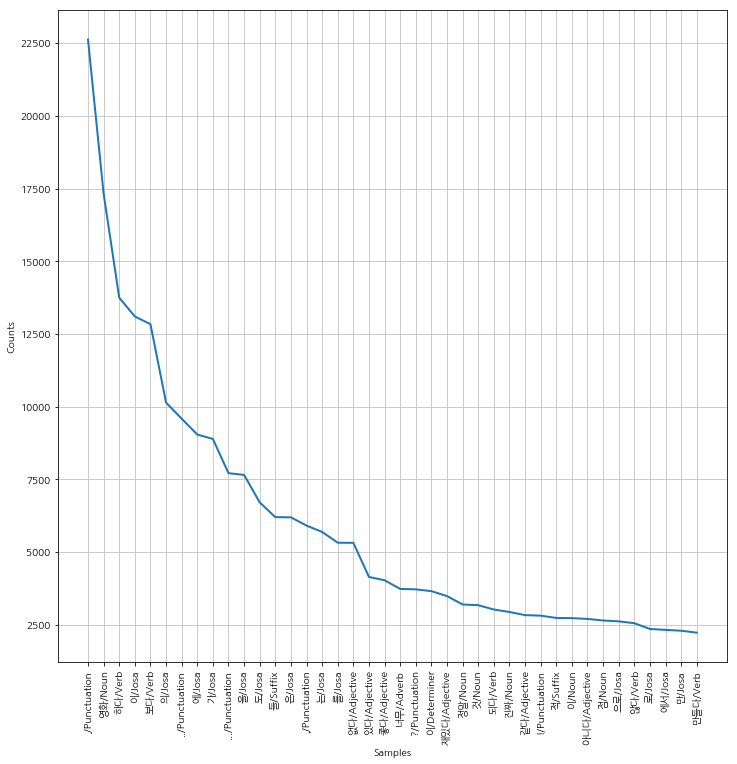

In [83]:
len(words)
pprint(words[:10])
import nltk
words_nltk = nltk.Text(words, name="Words in movie reviews")

print(words_nltk.vocab().most_common(10))

import matplotlib.pyplot as plt
matplotlib.rc('font',family='NanumGothic')
%matplotlib inline
plt.figure(figsize=(12,12))
words_nltk.plot(40)

['굳다/Adjective',
 'ㅋ/KoreanParticle',
 '뭐/Noun',
 '이/Noun',
 '평점/Noun',
 '나쁘다/Adjective',
 '않다/Verb',
 '점/Noun',
 '짜다/Verb',
 '리/Noun']
[('영화/Noun', 17324),
 ('하다/Verb', 13747),
 ('보다/Verb', 12838),
 ('없다/Adjective', 5319),
 ('있다/Adjective', 4146),
 ('좋다/Adjective', 4033),
 ('너무/Adverb', 3735),
 ('재밌다/Adjective', 3489),
 ('정말/Noun', 3199),
 ('것/Noun', 3176)]


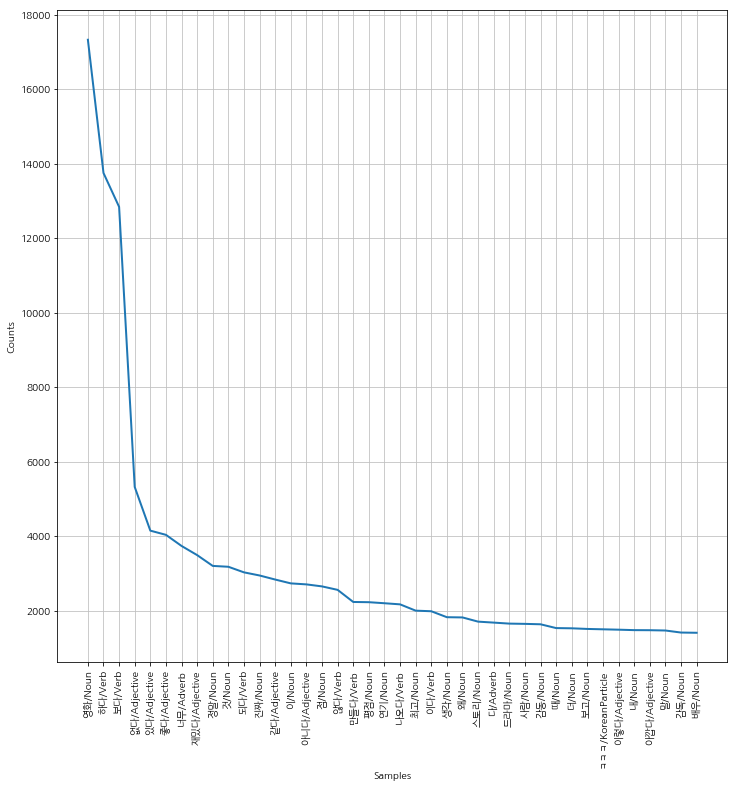

In [84]:
Non_stop_words = ['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'KoreanParticle']
words_new= [w for w in words if w.split('/')[-1] in Non_stop_words]
pprint(words_new[:10])
words_nltk_new = nltk.Text(words_new, name="new words in movie reviews")

pprint(words_nltk_new.vocab().most_common(10))
plt.figure(figsize=(12,12))
words_nltk_new.plot(40)

In [71]:
from matplotlib import font_manager as fm
m = fm.fontManager
for i in m.ttflist:
    if i.name.startswith("Na") :
        print(i.fname.split('\\')[-1])   


나눔고딕Bold.ttf
나눔고딕ExtraBold.ttf
NanumGothic.ttf
나눔고딕.ttf
NanumGothicBold.ttf
nrkis.ttf


In [ ]:
import numpy as np
import math

w = np.random.randint(0,2,(10,20))

from  sympy import *
init_printing(use_latex='mathjax')


def forward_elimination(A, b, n):
    """
    Calculates the forward part of Gaussian elimination.
    """
    for row in range(0, n-1):
        for i in range(row+1, n):
            factor = A[i,row] / A[row,row]
            for j in range(row, n):
                A[i,j] = A[i,j] - factor * A[row,j]

            b[i] = b[i] - factor * b[row]

        #print('A = \n%s and b = %s' % (A,b))
    return A, b

def back_substitution(a, b, n):
    """"
    Does back substitution, returns the Gauss result.
    """
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / a[n-1, n-1]
    for row in range(n-2, -1, -1):
        sums = b[row]
        for j in range(row+1, n):
            sums = sums - a[row,j] * x[j]
        x[row] = sums / a[row,row]
    return x

def gauss(A, b):
    """
    This function performs Gauss elimination without pivoting.
    """
    n = A.shape[0]

    # Check for zero diagonal elements
    if any(np.diag(A)==0):
        pass
        #raise ZeroDivisionError(('Division by zero will occur; pivoting currently not supported'))

    A, b = forward_elimination(A, b, n)
    return back_substitution(A, b, n)

def gen_rand_matrix(m,n,kappa):
#
#
    k= min(m,n)
    (Q1,R1) = np.linalg.qr(np.random.rand(m,m))
    (Q2,R2) = np.linalg.qr(np.random.rand(n,n))

    U = Q1[0:m,0:k]
    V = Q2[0:k,0:n]
    j=k-1

    l = kappa**(1/j)
    x1 = np.arange(0,j+1)
    x2 = np.flip(x1,axis=0)
    sing = np.power(l,x2)
    S = np.diag(sing)
    Vt = np.transpose(V)

    M = np.dot(np.dot(U,S),Vt)
    return M

#kappa = 1/(math.exp(1e-3)-1)
kappa = 2
m=10
A =w
#A  = gen_rand_matrix(m,m,kappa)
x = np.random.rand(20,10)
b = np.dot(A,x)
xhat1 = gauss(A,b)

xerror1 = np.linalg.norm(xhat1-x)/np.linalg.norm(x)

Matrix(A)

In [ ]:
w = np.random.randint(0,2,(10,20))
print(w)
from  sympy import *
init_printing(use_latex='mathjax')
Matrix(w)